In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
SEED = 1234
NUM_SAMPLES = 50

In [6]:
np.random.seed(SEED)

In [7]:
def generate_data(num_samples) :
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10, 20, size=num_samples)
    y = 3.5*X + random_noise

    return X, y

In [12]:
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T

print({data.shape})
print(data[:5])

{(50, 2)}
[[ 0.         19.3711646 ]
 [ 1.         19.93696739]
 [ 2.         15.83045764]
 [ 3.         28.414596  ]
 [ 4.         25.74369859]]


In [14]:
df = pd.DataFrame(data, columns= ["X", "y"])
X = df[["X"]].values
y = df[["y"]].values

df.head()

,X,y
0,0.0,19.371165
1,1.0,19.936967
2,2.0,15.830458
3,3.0,28.414596
4,4.0,25.743699


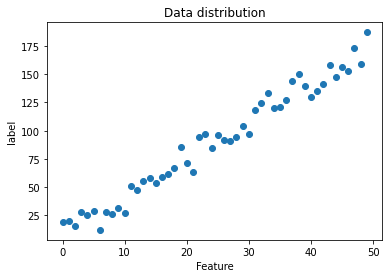

In [22]:
plt.scatter(x = df["X"], y = df["y"])
plt.xlabel("Feature")
plt.ylabel("label")
plt.title("Data distribution")
plt.show()

In [23]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15
SHUFFLE = True

In [25]:
if SHUFFLE:
    indices = list(range(NUM_SAMPLES))
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

In [28]:
# split data
train_start = 0
train_end = int(0.7*NUM_SAMPLES)

val_start = train_end
val_end = int(0.85*NUM_SAMPLES)

test_start = val_end

In [29]:
X_train = X[train_start : train_end]
y_train = y[train_start : train_end]

X_val = X[val_start : val_end]
y_val = y[val_start : val_end]

X_test = X[test_start : ]
y_test = y[test_start : ]

In [30]:
print(f"X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"X_val : {X_val.shape}, y_val : {y_val.shape}")
print(f"X_test : {X_test.shape}, y_test : {y_test.shape}")

X_train : (35, 1), y_train : (35, 1)
X_val : (7, 1), y_val : (7, 1)
X_test : (8, 1), y_test : (8, 1)


In [31]:
def standard(data, mean, std):
    return (data - mean) / std

In [32]:
X_mean = np.mean(X_train)
X_std = np.std(X_train)

y_mean = np.mean(X_train)
y_std = np.std(y_train)

In [33]:
#Standardize our data
X_train = standard(X_train, X_mean, X_std)
y_train = standard(y_train, y_mean, y_std)

X_val = standard(X_val, X_mean, X_std)
y_val = standard(y_val, y_mean, y_std)

X_test = standard(X_test, X_mean, X_std)
y_test = standard(y_test, y_mean, y_std)

In [37]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = y_train.shape[1]

In [39]:
Weight = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
bias = np.zeros((1,1))

print(f"Weights : {Weight.shape}, bias : {bias.shape}")

Weights : (1, 1), bias : (1, 1)


In [40]:
y_pred = np.dot(X_train, Weight) + bias
print(f"y_pred shape : {y_pred.shape}") 

y_pred shape : (35, 1)


$J(\theta) = MSE = \frac{1}{N} \sum_{i-1}^{N} (y_i - \hat{y}_i)^2 $
    * ${y}$ = ground truth | $\in \mathbb{R}^{NX1}$
    * $\hat{y}$ = predictions | $\in \mathbb{R}^{NX1}$

In [41]:
N = len(y_train)
loss = (1 / N ) * np.sum((y_train - y_pred) ** 2)
print(f" Loss : {loss:.2f}")

Loss : 3.18


 * $J(\theta) = \frac{1}{N} \sum_i (y_i - \hat{y}_i)^2  = \frac{1}{N}\sum_i (y_i - X_iW)^2 $
    * $\frac{\partial{J}}{\partial{W}} = -\frac{2}{N} \sum_i (y_i - X_iW) X_i = -\frac{2}{N} \sum_i (y_i - \hat{y}_i) X_i$
    * $\frac{\partial{J}}{\partial{W}} = -\frac{2}{N} \sum_i (y_i - X_iW)1 = -\frac{2}{N} \sum_i (y_i - \hat{y}_i)1$

In [44]:
#Backpropgation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

In [45]:
LEARNING_RATE = 1e-1

In [46]:
Weight += - LEARNING_RATE * dW
bias += - LEARNING_RATE * db

In [51]:
NUM_EPOCHS = 50

In [54]:
Weight = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
bias = np.zeros((1,1))

for epoch in range(NUM_EPOCHS):
    
    # Fit model (Forward Pass)
    y_pred = np.dot(X_train, Weight) + bias

    # Check Cost
    loss = (1 / len(y_train)) * np.sum((y_train - y_pred) ** 2)

    # Calculate Gradient
    dW = -(2 / len(y_train)) * np.sum((y_train - y_pred) * X_train)
    dB = -(2 / len(y_train)) * np.sum((y_train - y_pred) * 1)

    # Update weight and bias
    Weight += -LEARNING_RATE * dW
    bias += -LEARNING_RATE * dB

    #Show Progress
    if epoch%10 == 0:
            print(f"Epoch: {epoch}, loss: {loss:.5f}")

Epoch: 0, loss: 3.15894
Epoch: 10, loss: 0.07172
Epoch: 20, loss: 0.03613
Epoch: 30, loss: 0.03572
Epoch: 40, loss: 0.03571


In [56]:
y_pred_test = np.dot(X_test, Weight) + bias

In [58]:
# Train and Test MSE
train_msc = np.mean((y_train - y_pred) ** 2)
test_msc = np.mean((y_test - y_pred_test) ** 2)

print(f"train error: {train_msc:.2f} , test error: {test_msc:.2f}")

train error: 0.04 , test error: 0.02


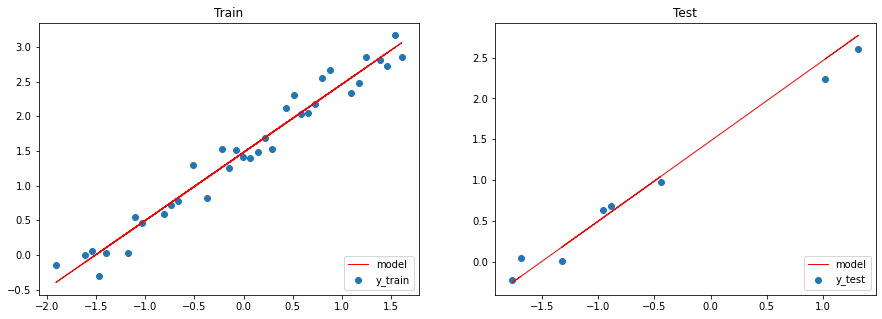

In [59]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label='y_train')
plt.plot(X_train, y_pred, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, y_pred_test, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Show plots
plt.show()


$\hat{y}_{scaled} = b_{scaled} + \sum_{j=1}^{k}W_{{scaled}_j}x_{{scaled}_j}$
* $y_{scaled} = \frac{\hat{y} - \bar{y}}{\sigma_y}$
* $x_{scaled} = \frac{x_j - \bar{x}_j}{\sigma_j}$

$\frac{\hat{y} - \bar{y}}{\sigma_y} = b_{scaled} + \sum_{j=1}^{k}W_{{scaled}_j}\frac{x_j - \bar{x}_j}{\sigma_j}$

$ \hat{y}_{scaled} = \frac{\hat{y}_{unscaled} - \bar{y}}{\sigma_y} = {b_{scaled}} + \sum_{j=1}^{k} {W}_{{scaled}_j} (\frac{x_j - \bar{x}_j}{\sigma_j}) $

$\hat{y}_{unscaled} = b_{scaled}\sigma_y + \bar{y} - \sum_{j=1}^{k} {W}_{{scaled}_j}(\frac{\sigma_y}{\sigma_j})\bar{x}_j + \sum_{j=1}^{k}{W}_{{scaled}_j}(\frac{\sigma_y}{\sigma_j})x_j $

In the expression above, we can see the expression $\hat{y}_{unscaled} = W_{unscaled}x + b_{unscaled} $ where

* $W_{unscaled} = \sum_{j=1}^{k}{W}_j(\frac{\sigma_y}{\sigma_j}) $

* $b_{unscaled} = b_{scaled}\sigma_y + \bar{y} - \sum_{j=1}^{k} {W}_j(\frac{\sigma_y}{\sigma_j})\bar{x}_j$

In [60]:
#Weights and bias that fit standardized data
print(Weight, bias)

[[0.98196802]] [[1.47960964]]


In [61]:
Weight_unscaled = Weight * (y_std / X_std)
bias_unscaled = bias * y_std + y_mean - np.sum(Weight_unscaled * X_mean)

print(Weight_unscaled, bias_unscaled)

[[3.34524224]] [[7.63293451]]


In [2]:
conda activate vizEnv


Note: you may need to restart the kernel to use updated packages.


In [21]:
!conda activate vizEnv

In [22]:
import os
print(os.environ['CONDA_PREFIX'])

C:\Users\deepak\anaconda3


In [4]:
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process import GaussianProcessRegressor

X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
gpr = GaussianProcessRegressor(kernel=DotProduct(), random_state=0).fit(X, y)
gpr.score(X, y)
gpr.predict(X[:2,:], return_std=True)


LinAlgError: ("The kernel, DotProduct(sigma_0=1), is not returning a positive definite matrix. Try gradually increasing the 'alpha' parameter of your GaussianProcessRegressor estimator.", '7-th leading minor of the array is not positive definite')